# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="attachment:ai_eval_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 90 баллов

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# обратите внимание, что Scikit-Learn импортируется как sklearn
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sns.set(style="whitegrid", font_scale=1.3, palette=["#1f77b4", "#2ca02c"])


random_state = 42

#### Тренировочные задачи на библиотеки

Если вы неуверенно себя чувствуете в библиотеках numpy, pandas, matplotlib, seaborn, рекомендуем сначала
* посмотреть материалы по библиотекам на нашем сайте
* прорешать упражнения на библиотеки на странице курса
* прорешать <a href="https://contest.yandex.ru/contest/75090/enter/">два упражнения на numpy</a> в системе Яндекс.Контест.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 9ede240862d9bf1602556040405c317e -->
---
### <font color="blue"><i>Легкая часть</i></font>

### Задача 1

На семинаре мы разбирали классификацию изображений на основе kNN. В этом задании мы вернемся к датасету [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) и попробуем улучшить результат, полученный на семинаре.

Для начала, загрузите данные и разделите их на обучающую и тестовую части.

In [4]:
mnist = fetch_openml('mnist_784')
digits = datasets.load_digits()

n_samples = len(digits["images"])
X, y = digits["images"].reshape(n_samples, -1), digits["target"]

#Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=random_state
)

Число соседей в модели kNN является необучаемым параметром т.е. гиперпараметром который выставляется вручную. Как мы видели на лекции, выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.

Постройте график зависимости точности (`accuracy_score`) предсказания kNN от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

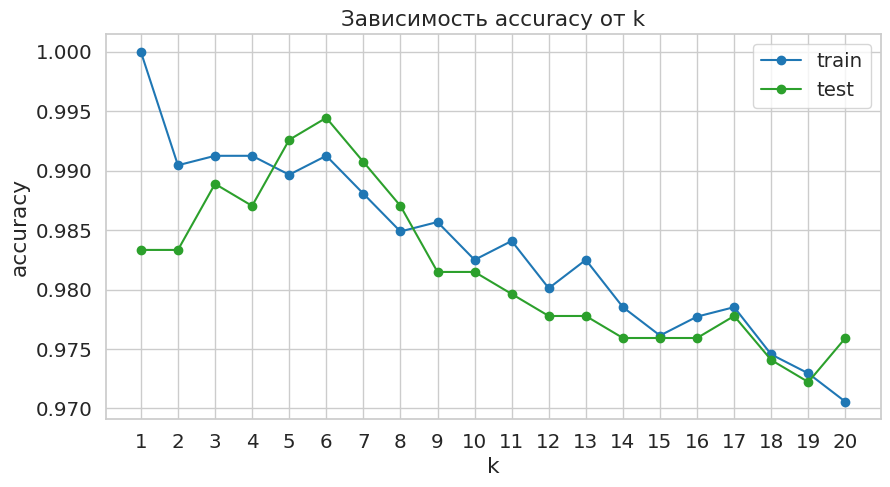

In [5]:
plt.figure(figsize=(10, 5))

accuracy_scores_train = []
accuracy_scores_test = []
array_of_k = np.arange(1, 21)

for k in range(20):
  model = KNeighborsClassifier(n_neighbors=k+1, algorithm="brute", p=2)
  model.fit(X_train, y_train)
  
  #test
  y_pred = model.predict(X_test)
  accuracy_scores_test.append(accuracy_score(y_test, y_pred))
  
  #train
  y_pred = model.predict(X_train)
  accuracy_scores_train.append(accuracy_score(y_train, y_pred))
  


plt.title("Зависимость accuracy от k")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.plot(array_of_k, accuracy_scores_train, marker='o')
plt.plot(array_of_k, accuracy_scores_test, marker='o')
plt.legend(["train", "test"])
plt.xticks(np.arange(1, 21, 1))
plt.grid(True)
plt.show()


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- fe9171a6e245a953987df27f018c61c2 -->
&#x2753; **Вопрос** &#x2753;

> Почему при $k = 1$ на тренировочной выборке метрика качества составляет 100%.

**Ваш ответ:** При \( k = 1 \) каждый объект оказывается ближайшим соседом самому себе, поэтому модель возвращает его же метку, что приводит к 100% точности на обучающей выборке. 




<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- cdb15caec1719ca7ba80d25b716879ca -->
Помимо числа соседей гиперпараметром модели также является *метрика расстояния* между объектами.

> По умолчанию используется *Евклидова метрика* ($L_2$), согласно которой расстояние между двумя точками $x_1 =(x_{11}, …, x_{1d})$ и $x_2=(x_{21},…,x_{2n})$ в $d$-мерном пространстве определяется как:
$$\rho(x_1, x_2) = \sqrt{\sum^d_{j=1}\left(x_{1j} - x_{2j}\right)^2}.$$
>
> Иногда в kNN имеет смысл использовать другие метрики, например *метрику Манхэттена* ($L_1$).
$$\rho(x_1, x_2) = \sum^d_{j=1} \left|x_{1j} - x_{2j}\right|.$$
>
> Выбор одной из них зависит от особенностей задачи и данных. В частности,
>
> * метрика Манхэттена менее чувствительна к выбросам, чем евклидово расстояние, что делает её полезной для данных с сильным шумом или при наличии аномалий;
>
> * в задачах с разреженными данными (например, текстовые данные, представленные в виде векторов) метрика Манхэттена может работать лучше, чем евклидово расстояние.

Проведите аналогичный эксперимент используя в качестве гиперпараметра $L_1$-метрику (выясните сами, как ее задать). Выведите на одном графике зависимости точности (accuracy) от значения $k$ для обучающей и тестовой выборок для обоих метрик.

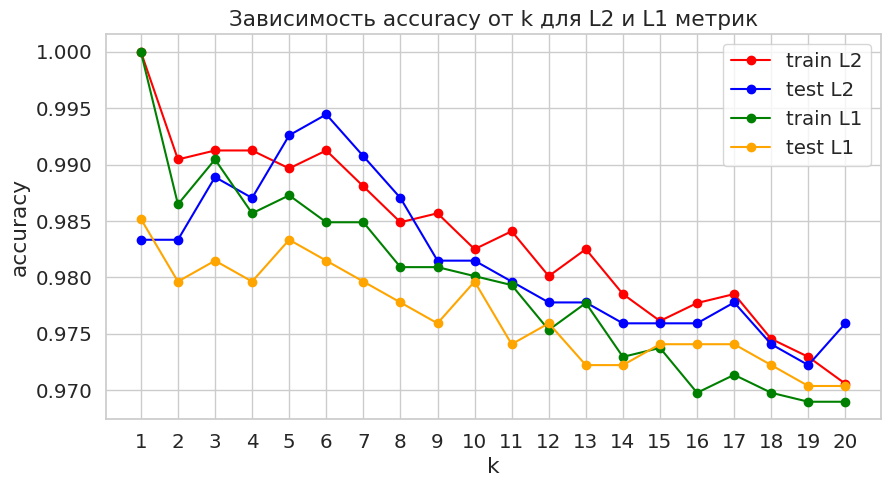

In [6]:
plt.figure(figsize=(10, 5))

#accuracy для евклидовой метрики (L2, p=2)
accuracy_scores_train_L2 = []
accuracy_scores_test_L2 = []

# accuracy для манхэттенской метрики (L1, p=1)
accuracy_scores_train_L1 = []
accuracy_scores_test_L1 = []

array_of_k = np.arange(1, 21)

for k in range(20):
  # Модель с евклидовой метрикой (L2, p=2)
  model_L2 = KNeighborsClassifier(n_neighbors=k+1, algorithm="brute", p=2)
  model_L2.fit(X_train, y_train)
  
  #test (L2)
  y_pred = model_L2.predict(X_test)
  accuracy_scores_test_L2.append(accuracy_score(y_test, y_pred))
  
  #train (L2)
  y_pred = model_L2.predict(X_train)
  accuracy_scores_train_L2.append(accuracy_score(y_train, y_pred))
  
  #Модель с манхэттенской метрикой (L1, p=1)
  model_L1 = KNeighborsClassifier(n_neighbors=k+1, algorithm="brute", p=1)
  model_L1.fit(X_train, y_train)
  
  # test (L1)
  y_pred = model_L1.predict(X_test)
  accuracy_scores_test_L1.append(accuracy_score(y_test, y_pred))
  
  #train (L1)
  y_pred = model_L1.predict(X_train)
  accuracy_scores_train_L1.append(accuracy_score(y_train, y_pred))


plt.title("Зависимость accuracy от k для L2 и L1 метрик")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.plot(array_of_k, accuracy_scores_train_L2, marker='o', color='red', label="train L2")
plt.plot(array_of_k, accuracy_scores_test_L2, marker='o', color='blue', label="test L2")
plt.plot(array_of_k, accuracy_scores_train_L1, marker='o', color='green', label="train L1")
plt.plot(array_of_k, accuracy_scores_test_L1, marker='o', color='orange', label="test L1")
plt.xticks(np.arange(1, 21, 1))
plt.legend()
plt.grid(True)
plt.show()


&#x2754; **Вопрос** &#x2754;

> Как вы думаете почему смена метрики так сильно повлияла на характер кривых?

**Ваш ответ:** .Смена метрики изменяет способ вычисления расстояния между объектами, что приводит к различному выбору ближайших соседей и, как следствие, к изменению границ решений. В частности, L1-метрика (манхэттенская) менее чувствительна к большим отклонениям и выбросам, тогда как L2-метрика (евклидова) усиливает влияние крупных различий, что отражается на характере кривых точности.


**Выводы:**

- **Зависимость от числа соседей:**  
  При маленьких значениях \( k \) модель показывает 100% точность на тренировочных данных, так как каждый пример выбирается как собственный ближайший сосед. С увеличением \( k \) происходит усреднение решений, что влияет на точность как на обучающих, так и на тестовых выборках.

- **Разница между метриками расстояния:**  
  При использовании евклидовой (L2) и манхэттенской (L1) метрик способ расчёта расстояния между объектами меняется. L1-метрика учитывает разности признаков линейно и менее чувствительна к большим отклонениям, а L2-метрика выделяет объекты с более значительными различиями, что приводит к различным зависимостям точности от \( k \).

- **Общее влияние гиперпараметров:**  
  Оптимальный выбор числа соседей и типа метрики зависит от данных. Правильное сочетание этих параметров помогает добиться лучших результатов на тестовой выборке, отражая более точное разделение классов.


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->


---

### Задача 2

Перед выполнением задачи рекомендуется посмотреть <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">материал</a> с семинара.

#### 0. Подготовка данных

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.


Загрузите данные с помощью `pandas`.

In [7]:
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Для лучшего понимания процесса работы с данными, уточним ключевые термины.

> **Объект** — это единица данных, представленная набором признаков и используемая для обучения или предсказаний модели. В данной задаче являются пассажиры, им соответствуют *строки* таблицы данных.
>
> **Признаки (features)** — это характеристики, которые описывают объекты в данных. В таблицах данных они обычно соответствуют *колонкам*. В данной задаче мы будем работать со следующими признаками
>
> * `Pclass` — класс билета (1 = первый класс, 2 = второй класс, 3 = третий класс);
>
> * `Age` — возраст пассажира;
>
> * `SibSp` — количество братьев, сестер или супругов на борту;
>
> * `Parch` — количество родителей или детей на борту;
>
> * `Fare` — стоимость билета.
>
> **Таргет (target)** — это целевая переменная, которую мы хотим предсказать. В данной задаче мы будем предсказывать `Survived` — бинарная переменная, указывающая, выжил ли пассажир (1) или нет (0). Значения этой переменной имеются для обучающего набора данных, а для тестого — нет.

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак, который мы хотим предсказать.

In [8]:
features_columns = ["Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]
target_column = "Survived"  # Целевой признак

X, y = titanic[features_columns], titanic[target_column]

В данных могут присутствовать пропуски. Пока что мы не умеем с ними работать, так что исключим из данных.

Посмотрите, сколько объектов имеют хотя бы один пропуск. Удалите их из данных.

In [9]:
number_obj_with_mis = X.isnull().any(axis=1).sum()

X = X.dropna()
y = y[X.index]
print(f"Объектов имеют хотя бы один пропус {number_obj_with_mis}")

Объектов имеют хотя бы один пропус 177


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=random_state
)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 371b31e8ca86989a98cce342afcbbf2a -->
#### 1. Исследование

> &#x2757; **Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков, посмотрите презентацию про оформление домашних заданий.*

In [11]:
#Объединяем данные для удобства
train_df = pd.concat([X_train, y_train], axis=1)

**Рассмотрим зависимость выживания от класса пассажира:**

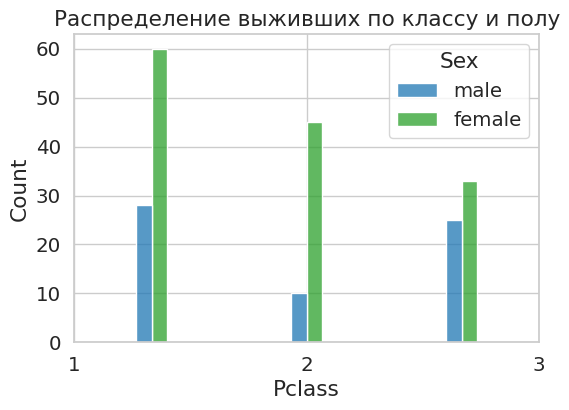

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(
    data=train_df,
    x="Pclass",
    hue="Sex",
    weights="Survived", # веса на основе признака выживания
    bins=3,  
    multiple="dodge",
    shrink=0.2,
)
plt.xticks(np.arange(1, 4, 1))
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Распределение выживших по классу и полу")
plt.show()

**Выводы по графику и статистике распределения возрастов выживших пассажиров:**


Очевидно, что **пол** (Sex) является одним из главных факторов, определяющих выживаемость, поскольку процент выживших среди женщин во всех классах заметно выше, чем среди мужчин. Кроме того, **класс билета** (Pclass) также оказывает влияние на шансы спастись: чем выше класс (особенно 1-й), тем выше доля выживших, независимо от пола.


**Рассмотрим зависимость выживания от возраста и пола пассажира:**

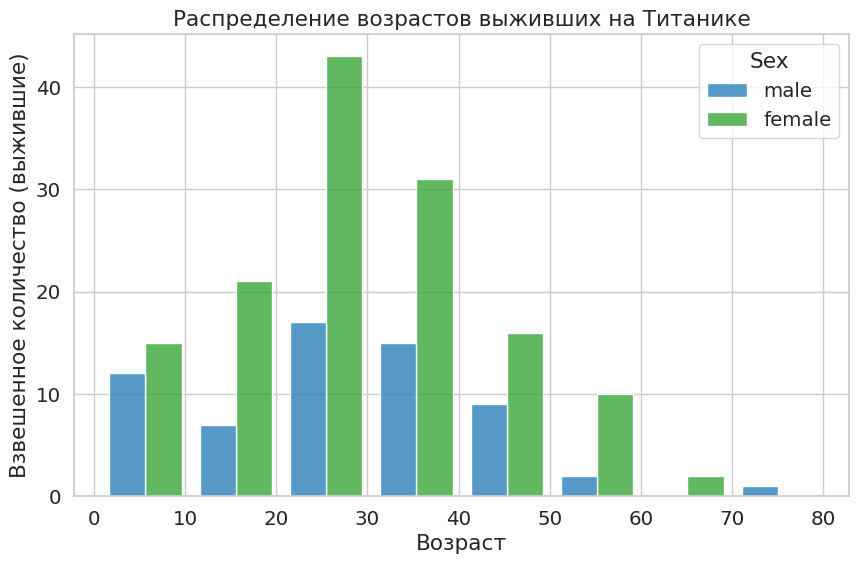

count       mean        std   min   25%   50%   75%   max
Sex    Survived                                                           
female 0          41.0  26.512195  13.444556  2.00  18.0  26.0  38.0  50.0
       1         138.0  28.916667  14.587307  0.75  19.0  28.5  38.0  63.0
male   0         257.0  32.463035  14.546249  1.00  22.0  30.0  41.0  74.0
       1          63.0  27.353175  16.559918  0.67  18.5  28.0  36.5  80.0

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=train_df,
    x="Age",
    hue="Sex",
    weights="Survived", # веса на основе признака выживания
    bins=8,  
    multiple="dodge",
    shrink=0.8,
)
plt.title("Распределение возрастов выживших на Титанике")
plt.xlabel("Возраст")
plt.ylabel("Взвешенное количество (выжившие)")
plt.show()
train_df.groupby(["Sex", "Survived"])["Age"].describe()

**Выводы по графику и статистике распределения возрастов выживших пассажиров:**

Из гистограммы и статистики видно, что женщины выживали чаще, чем мужчины, и возраст не был решающим фактором для выживания среди женщин. У мужчин доля выживших была заметно ниже, особенно в возрастных диапазонах 20–40 лет.



**Рассмотрим теперь фактор количества знакомых, так как знакомые скорее всего помогали друг другу**

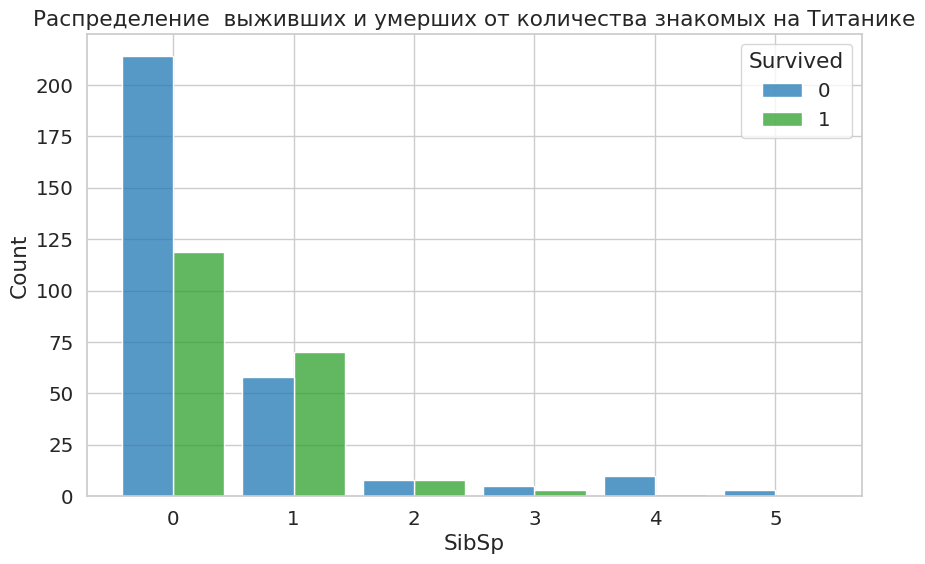

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=train_df,
    x="SibSp",
    hue="Survived",
    discrete=True,
    multiple="dodge",
    binwidth=1,
    bins = 5,
    shrink=0.85,
)
plt.xlabel("SibSp")
plt.ylabel("Count")
plt.xticks(np.arange(0, max(train_df["SibSp"]) + 1, 1))
plt.title("Распределение  выживших и умерших от количества знакомых на Титанике")
plt.show()

Явно можно сказать, что околичество знакомых особо не влияет на выживание, поэтому этот фактор не считается определяющим для целевой переменной

**Выводы**
1. Важнейшими предикторами выживания на «Титанике» оказались пол и класс билета: женщины спасались чаще мужчин, а пассажиры первого класса — заметно чаще, чем те, кто ехал в третьем.  
2. Возраст оказывал влияние в основном у мужчин, где люди 20–40 лет реже выбирались, чем более молодые или пожилые.  
3. Количество родственников и знакомых (SibSp, Parch) не продемонстрировало столь очевидной взаимосвязи с выживанием, хотя наличие хотя бы одного родственника иногда повышало шансы.  
4. В целом анализ подтверждает исторические факты о приоритетной эвакуации женщин и пассажиров первого класса и показывает, что другие факторы действовали менее существенно.  
5. При построении модели следует в первую очередь учесть пол и класс, так как их влияние наиболее выражено и однозначно.  


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 476dce11b8cac8705a10bff695e4cdee -->
#### 2. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики. Любые решения "из коробки" использовать запрещено. Например, достаточно пояснения "*по графику (описание графика) визуально я увидел, что при X > 100 большинство пассажиров выжило, поэтому использую правило (описание правила)*".

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. Дерево из одного листа имеет глубину 0.

*Указание*. Попросите ИИ красиво оформить описание дерева и его пояснение.

**Дерево 1:**

Для построения дерева будем использовать 2 главных признака: пол и класс пассажира. Так как женщины из 1 и 2 класса спасаются почти в ста процентах случаев, а мужчины из 2 и 3 класса спасаются меньше, чем в 50% случаев:


![Описание изображения](tree1.png)


**Дерево 2:**

Для реализации второго дерева учтем тот факт, что количество спасенных женщин в несколько раз больше количества спасенных мужчин: 
 
 ![Описание изображения](tree2.png)


Реализуйте полученные деревья по шаблону

In [15]:
def tree1(features: pd.DataFrame) -> pd.Series:
    """
    Предсказание целевого признака для данных features с использованием дерева 1.
    Дерево 1: 
      - Если пассажир является женщиной и его класс билета меньше 3, то предсказывается "выжил" (1).
      - Либо, если класс билета равен 1, то независимо от пола предсказывается "выжил" (1).
      - Иначе предсказывается "не выжил" (0).
    Возвращает pandas.Series с теми же индексами, что и у features.
    """
    predicted = (((features["Sex"] == "female") & (features["Pclass"] < 3)) | (features["Pclass"] == 1)).astype(int)
    return predicted

In [16]:
def tree2(features: pd.DataFrame) -> pd.Series:
    """
    Предсказание целевого признака для данных features с использованием дерева 2.
    Дерево 2:
      - Если пассажир является женщиной, то предсказывается "выжил" (1).
      - Иначе (если пассажир является мужчиной) предсказывается "не выжил" (0).
    Возвращает pandas.Series с теми же индексами, что и у features.
    """
    predicted = (features["Sex"] == "female").astype(int)
    return predicted

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 509cca15393d5b0fb3cf40b463d12077 -->
Проверьте работоспособность данных моделей на тестовой выборке и оцените качество модели по метрике `accuracy`.

> &#x2755; *Примечание.* Полученные значения не влияют на оценку по заданию. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [17]:
def accuracy(target: pd.Series, predicted: pd.Series) -> float:
    """
    Вычисление критерия качества для предсказания predicted,
    если истинные значения – target.
    Возвращает одно вещественное число, равное доле верных предсказаний.
    """
    correct = (target == predicted).sum()
    total = len(target)
    return correct / total

In [18]:
predicted_tree1 = tree1(X_test)
predicted_tree2 = tree2(X_test)

# Вычисляем accuracy для каждой модели
accuracy_tree1 = accuracy(y_test, predicted_tree1)
accuracy_tree2 = accuracy(y_test, predicted_tree2)

print(f"Accuracy для дерева 1: {accuracy_tree1:.2f}")
print(f"Accuracy для дерева 2: {accuracy_tree2:.2f}")

Accuracy для дерева 1: 0.76
Accuracy для дерева 2: 0.75


**Выводы** 


**Дерево 1** показывает чуть более высокую точность (около 76%), чем **Дерево 2** (около 75%). Разница невелика, что говорит о том, что оба дерева выделяют основные закономерности в данных.  
Для дальнейшего улучшения точности можно было бы учесть дополнительные факторы или применить более сложные модели, однако даже эти простые деревья дают вполне приемлемый уровень качества.  



<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2bf781f25f8969f7e712ea5d28d608a3 -->
#### 3. Классификация методом ближайшего соседа

В данной части задачи оставим только признаки `'Pclass'`, `'Age'`, `'Sex'`,`'Fare'`.


&#x2753; **Вопрос** &#x2753;
> Какие могли бы возникнуть проблемы при использовании признаков `'SibSp'`, `'Parch'`? Имеется ли подобная проблема для признака `'Pclass'`?

**Ваш ответ:**
Признаки `SibSp` и `Parch` дискретны и зачастую принимают значение 0, что может плохо влиять на качество измерения расстояния в kNN. Кроме того, признак `Pclass` также дискретен (1, 2, 3), и расстояние между классами может не отражать реальную разницу в условиях. В итоге метрика расстояния может быть искажена и приводить к некорректной классификации.



<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3bfbe10cf933e1302c2f524a99acfa54 -->
Постройте классификатор методом ближайшего соседа. Обучите его и оцените качество модели. Сравните с предыдущим методом.

Пока никаких преобразований данных делать не нужно.




In [19]:
#Оставляем только признаки из условия
features_columns = ["Pclass", "Age", "Sex", "Fare"]

X_test = X_test[features_columns]
X_train = X_train[features_columns]

#Преобразуем категориальный признак
X_test["Sex"] = X_test["Sex"].map({"male": 0, "female": 1})
X_train['Sex'] = X_train['Sex'].map({"male": 0, "female": 1})


Выбрали `p=1`, то есть манхэттенскую метрику, потому что она менее чувствительна к выбросам, чем евклидова метрика (p=2). При вычислении расстояния в kNN манхэттенская метрика суммирует абсолютные разницы по каждому признаку, что может быть полезно в случаях, когда признаки имеют различные масштабы или присутствуют аномальные значения, и мы хотим уменьшить их влияние на итоговый результат.


In [20]:
knn = KNeighborsClassifier(n_neighbors=5, algorithm="brute", p=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_knn = accuracy(y_test, y_pred)

#Манхэттенская метрика (L1-норма) вычисляет сумму абсолютных разностей между признаками, что делает её менее чувствительной к выбросам по сравнению с евклидовой метрикой.
# Это особенно полезно, когда признаки имеют различные масштабы или присутствуют дискретные значения. Кроме того, она может давать более стабильные результаты в задачах с низкой размерностью и при наличии несимметричных распределений.
print(f"Accuracy knn: {accuracy_knn:.2f}")

Accuracy knn: 0.70


**Сравнение**
- Таким образом, правило, основанное только на поле, оказалось наиболее эффективным, что подчёркивает важность данного признака.
- Различия между моделями демонстрируют, что более сложные комбинации признаков не всегда приводят к лучшим результатам, если один из признаков оказывает очень сильное влияние на целевую переменную.


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 21227e76b996f62c6c83ee38ce486bdf -->
Попробуем улучшить результаты предсказаний, для этого надо сначала посмотреть на сами данные. Выведите значение минимального и максимального объекта для каждого признака.

In [21]:
min_max = X.agg(['min', 'max'])
print(min_max)

     Pclass    Age     Sex  SibSp  Parch      Fare
min       1   0.42  female      0      0    0.0000
max       3  80.00    male      5      6  512.3292


Как мы видим данные в каждом столбце распределены очень по-разному.

&#x2753; **Вопрос** &#x2753;
> Как это может повлиять на работу kNN, почему?

**Ваш ответ:** 
Разные масштабы распределения признаков влияют на вычисление расстояний в kNN, т.к. признаки с большим диапазоном будут доминировать при расчёте расстояния. Это может привести к тому, что важные признаки с меньшим диапазоном окажутся недооценёнными, что негативно скажется на качестве предсказаний.



Для решения этой проблемы нужно привести признаки к единому масштабу. Существует много методов масштабирования рассмотрим работу одного из них &mdash; **минимаксная нормализация**

  
> **Минимакс** &mdash; линейное преобразование данных в диапазоне $[0, 1]$, где минимальное и максимальное масштабируемые значения соответствуют 0 и 1 соответственно.
> Реализуется оно по следующей формуле:
>
> $$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}$$
>
> где $x_{ij}$ &mdash; значение признака $j$ для объекта $i$, а $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ в обучающем наборе данных.  
> В модуле `sklearn.preprocessing` есть [класс](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) `MinMaxScaler`, который реализует эту операцию. Давайте рассмотрим методы этого класса подробнее:
>
> * `fit(X)`: вычисляет минимальные и максимальные значения для каждого признака.
>
> * `transform(X)`: применяет масштабирование к данным.
>
> * `fit_transform(X)`: объединяет оба метода, сначала подгоняя модель, а затем трансформируя данные.
>
> * `inverse_transform(X)`: восстанавливает исходные данные из масштабированных.


Стоит отметить что существуют и другие методы масштабирования данных.

&#x2753; **Вопрос** &#x2753;
> В чем может быть недостаток такого метода масштабирования?

**Ваш ответ:**
Минимаксная нормализация чувствительна к выбросам, так как экстремальные значения определяют границы масштабирования, что может сжимать большую часть данных в узкий диапазон. Это приводит к потере различий между обычными значениями, что негативно сказывается на качестве последующего моделирования.


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3cf8b0b6b0402c9ceb439c2de6ee4276 -->


Отмасштабируйте данные

In [22]:
X = X[features_columns]
X = X[features_columns]

#Преобразуем категориальный признак
X["Sex"] = X["Sex"].map({"male": 0, "female": 1})
scaler = MinMaxScaler()

# Масштабируем данные: fit_transform вычисляет минимальное и максимальное значение для каждого признака и преобразует данные
X_scaled = scaler.fit_transform(X)

# Преобразуем результат обратно в DataFrame для удобства
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.head())

   Pclass       Age  Sex      Fare
0     1.0  0.271174  0.0  0.014151
1     0.0  0.472229  1.0  0.139136
2     1.0  0.321438  1.0  0.015469
3     0.0  0.434531  1.0  0.103644
4     1.0  0.434531  0.0  0.015713


Теперь выведите значения максимума и минимума нормализованных признаков. Обратите внимание `MinMaxScaler` возвращается объект в виде `np.ndarray`.

In [23]:
print("Минимальные значения нормализованных признаков:", X_scaled.min(axis=0))
print("Максимальные значения нормализованных признаков:", X_scaled.max(axis=0))


Минимальные значения нормализованных признаков: [0. 0. 0. 0.]
Максимальные значения нормализованных признаков: [1. 1. 1. 1.]


Обучите модель и сравните результат предсказаний со стандартизацией и без.

In [24]:
knn_no_scaling = KNeighborsClassifier(n_neighbors=5, algorithm="brute", p=1)
knn_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = knn_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

# Стандартизация данных
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

# Модель со стандартизацией
knn_std = KNeighborsClassifier(n_neighbors=5, algorithm="brute", p=1)
knn_std.fit(X_train_std, y_train)
y_pred_std = knn_std.predict(X_test_std)
accuracy_std = accuracy_score(y_test, y_pred_std)

print(f"Accuracy без стандартизации: {accuracy_no_scaling:.2f}")
print(f"Accuracy со стандартизацией: {accuracy_std:.2f}")


Accuracy без стандартизации: 0.70
Accuracy со стандартизацией: 0.77


**Вывод:** 


После приведения признаков к единому масштабу точность выросла с 0.70 до 0.77, что указывает на существенную зависимость kNN от масштаба признаков. Это происходит, потому что большие значения в одном признаке могут «перекрыть» вклад остальных, и только после стандартизации модель может корректно учитывать каждый признак.


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 02a5bc7d6f2e8382a04db099c58ba6d1 -->
**А можем ли мы как-то еще повысить точность модели?**

Как мы видели, параметр $k$ числа соседей является необучаемым т.е. гиперпараметром, который выставляется вручную. Выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.



Постройте график зависимости точности (`accuracy_score`) от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

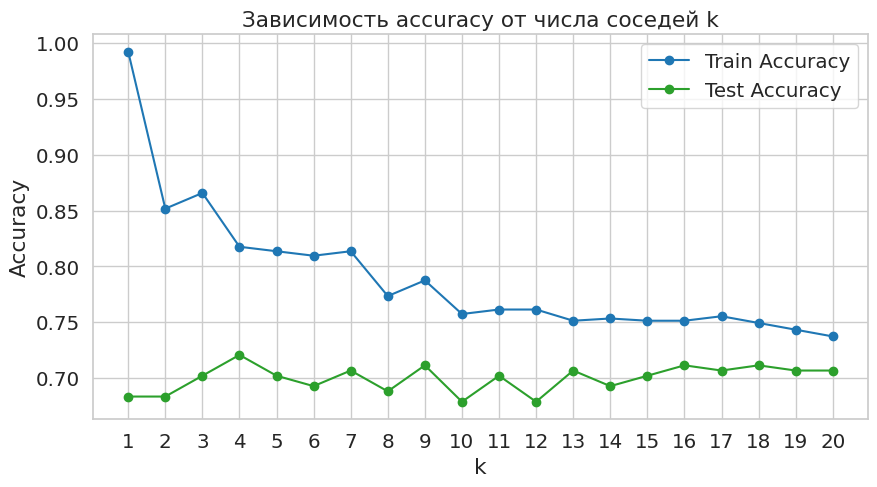

In [25]:
k_values = range(1, 21)

# Списки для хранения точности на обучающей (train) и тестовой (test) выборках
accuracy_train = []
accuracy_test = []

for k in k_values:
    # Создаем и обучаем модель kNN с текущим k
    knn = KNeighborsClassifier(n_neighbors=k, algorithm="brute", p=1)
    knn.fit(X_train, y_train)
    
    # Предсказания на обучающей и тестовой выборках
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    
    # Вычисляем точность
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    accuracy_test.append(accuracy_score(y_test, y_pred_test))

# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_train, marker='o', label='Train Accuracy')
plt.plot(k_values, accuracy_test, marker='o', label='Test Accuracy')
plt.title('Зависимость accuracy от числа соседей k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 21, 1))
plt.grid(True)
plt.legend()
plt.show()

**Вывод:** 
При \(k=4\) модель kNN показывает наилучшее качество. Это может быть обусловлено тем, что данные часто расположены на границе, близко к точкам с противоположными значениями. При увеличении значения k слишком много соседей включается в рассмотрение, включая тех, у которых обратные значения, что приводит к ухудшению результатов. С другой стороны, при слишком малых \(k\) (1–2) модель становится слишком чувствительной к выбросам и шумным точкам, из-за чего точность на тестовых данных также падает.

**Интересно посмотреть** что будет при разном параметре p.

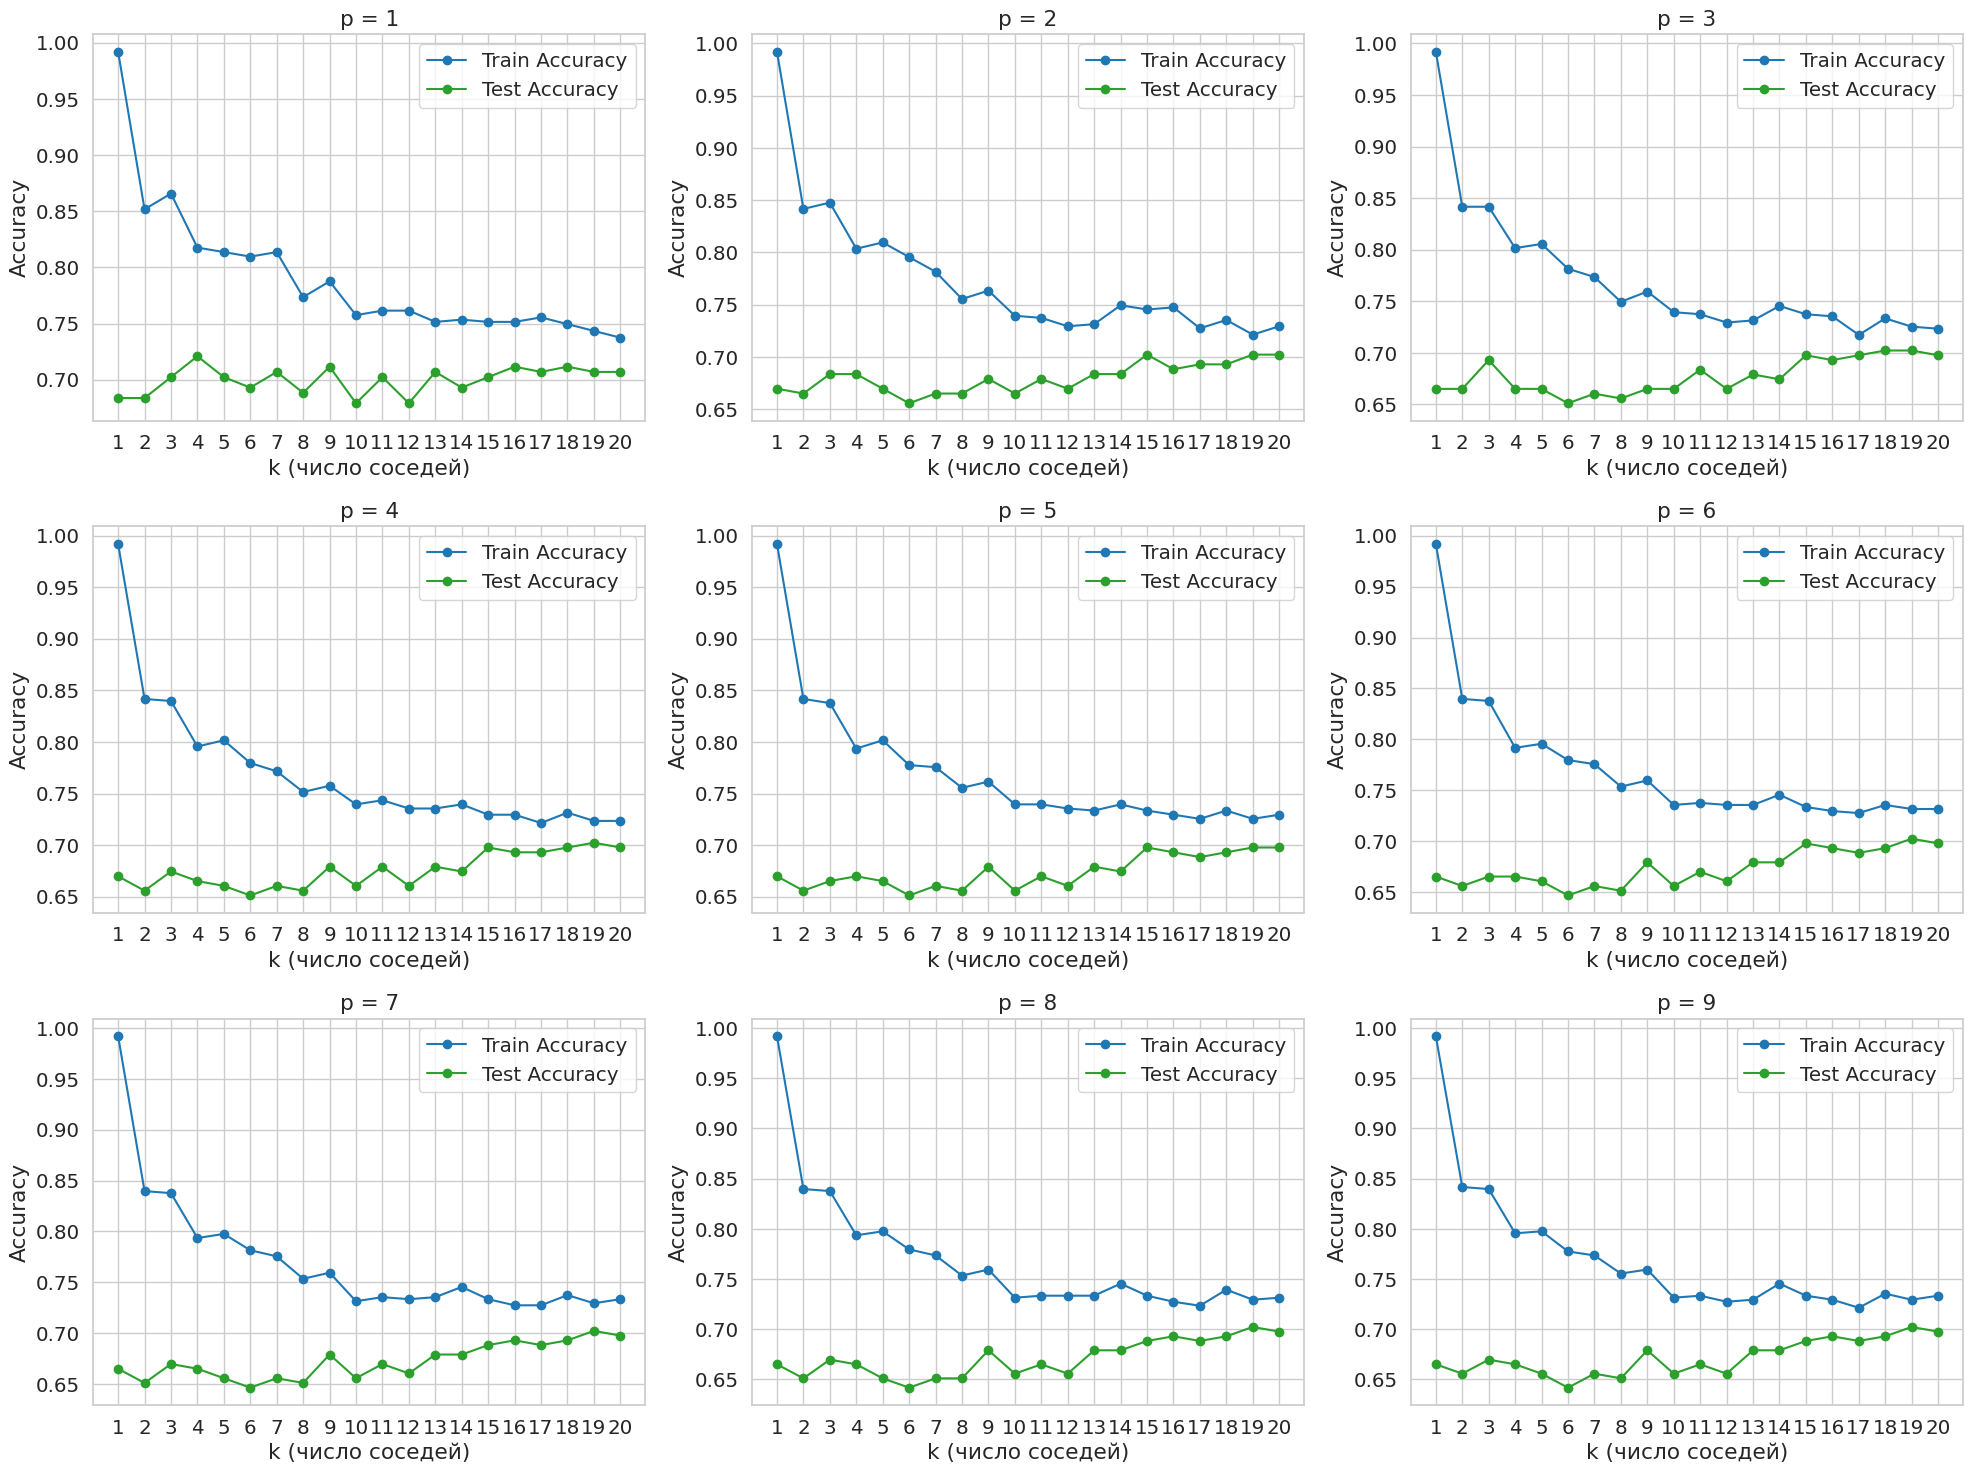

In [36]:
k_values = range(1, 21)
fig, axs = plt.subplots(3, 3, figsize=(20, 15))

for i, p in enumerate(range(1, 10)):
    accuracy_train = []
    accuracy_test = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, algorithm="brute", p=p)
        knn.fit(X_train, y_train)
        
        y_pred_train = knn.predict(X_train)
        y_pred_test = knn.predict(X_test)
        accuracy_train.append(accuracy_score(y_train, y_pred_train))
        accuracy_test.append(accuracy_score(y_test, y_pred_test))
    
    # Определяем координаты подграфика в сетке
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    
    ax.plot(k_values, accuracy_train, marker='o', label='Train Accuracy')
    ax.plot(k_values, accuracy_test, marker='o', label='Test Accuracy')
    ax.set_title(f'p = {p}')
    ax.set_xlabel('k (число соседей)')
    ax.set_ylabel('Accuracy')
    ax.set_xticks(np.arange(1, 21, 1))
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


**Вывод**
Из графиков видно, что оптимальное значение числа соседей \(k\) меняется при различных значениях \(p\). Однако наилучший результат достигается при \(p=1\) и \(k=4\), что подтверждает преимущество Манхэттенской метрики для данной задачи. Это указывает на то, что выбор правильной метрики расстояния критически важен для повышения качества классификации.